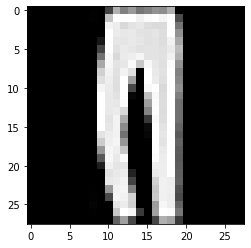

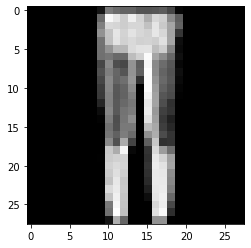

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4726 - accuracy: 0.8320
Epoch 2/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.3587 - accuracy: 0.8689
Reached 60% accuracy, so cancelling the training!
313/313 [==============================] - 1s 2ms/step - loss: 0.3907 - accuracy: 0.8584
res= [0.39067772030830383, 0.8583999872207642]
[4.4869928e-05 1.0402373e-07 9.9813902e-01 1.5648281e-07 6.6332397e-04
 5.7204019e-10 1.1524068e-03 1.6133782e-10 1.5845879e-07 4.3091971e-11]
2
[2.2292165e-06 9.9999750e-01 1.2814451e-07 1.5141983e-07 3.3361133e-08
 9.0661040e-13 1.1286523e-08 9.2929343e-13 1.0226961e-09 2.3677215e-12]
1
[6.1561383e-07 9.9999607e-01 1.9000554e-07 3.0569161e-06 4.6102667e-08
 3.3170685e-11 8.3452605e-09 8.1490543e-12 1.0660866e-09 8.6876256e-11]
1
[2.0180088e-01 4.3466012e-04 1.6745430e-01 2.0911284e-02 1.6591759e-02
 2.4506147e-04 5.8163816e-01 4.1182589e-04 1.0429515e-02 8.2643870e-05]
6
[1.41460521e-04 9.99833226e-01 1.3

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get("accuracy")>0.85:
      print("\nReached 60% accuracy, so cancelling the training!")
      self.model.stop_training = True

mnist=tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test,y_test)=mnist.load_data()
plt.imshow(x_test[2],cmap='gray');plt.show()
plt.imshow(x_test[3],cmap='gray');plt.show()
x_train, x_test=x_train/255.0, x_test/255.0

callbacks=myCallback()

model=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),       #flatten turns data in one dimensional set
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,callbacks=[callbacks])

res=model.evaluate(x_test,y_test)                     #evaluate shows accuracy and loss
print("res=",res)
classifications=model.predict(x_test)

for i in range(1,10):
  print(classifications[i])
  print(y_test[i])


